In [ ]:
#*****************************************LAB1 PART2****************************************************
#           by Shivam Sahu (UBIT Name - SSAHU3)
#           Team Member Name - Individual

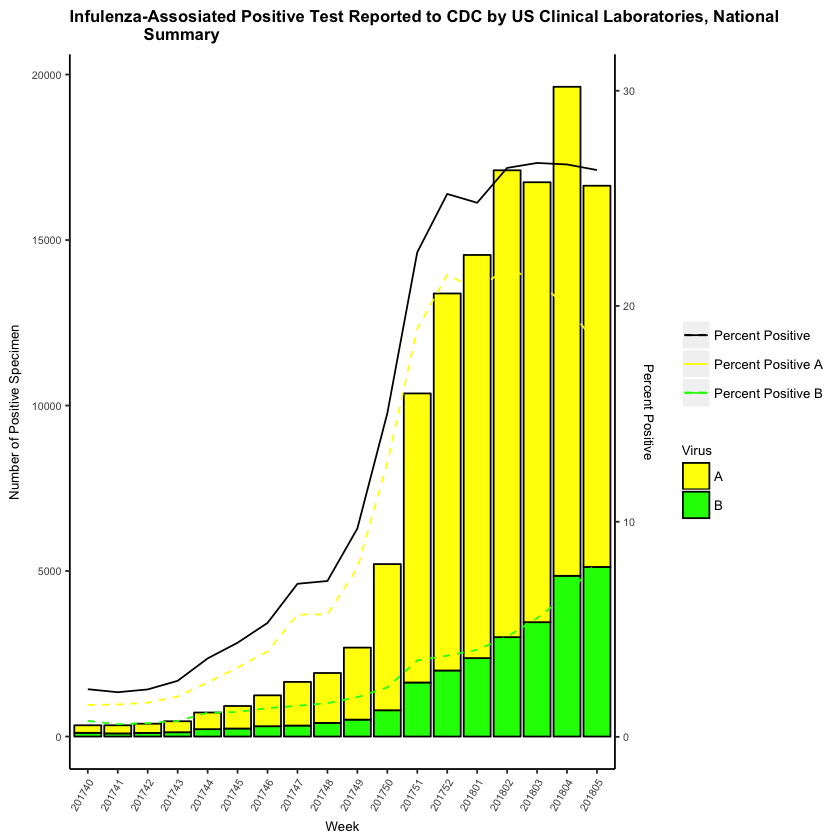

In [1]:
#*****************************************National Summary****************************************************
#install.packages("reshape2")
library(reshape2)
library(ggplot2)
pTest <- read.csv(file="NationalSummary.csv")[,1:3]
#head(pTest)
meltData <-melt(pTest,id.vars="Week")
#head(meltData)
pTest1 <- read.csv(file="NationalSummary.csv")[,1:7]
#head(pTest1)
total <- merge(meltData,pTest1,by="Week")
#head(total)

p <- ggplot(total, aes(x = factor(Week)))  


p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

p <- p + scale_fill_manual(name ="Virus", labels = c("A","B"),values = c("yellow", "green"))

p <- p + scale_y_continuous( sec.axis = sec_axis(~ . /650, name = "Percent Positive"))

p <- p + geom_line(aes(y = X..Positive*650, colour = "Percent Positive"),  group = "1")

p <- p + geom_line(aes(y = Percent.Positive.A*650, colour = "Percent Positive A"),  group = "1", linetype = 2)

p <- p + geom_line(aes(y = Percent.Positive.B*650, colour = "Percent Positive B"), group = "1", linetype = 2)

p <- p + labs(title = "Infulenza-Assosiated Positive Test Reported to CDC by US Clinical Laboratories, National
                Summary", y = "Number of Positive Specimen",x = "Week") 

p <- p + scale_colour_manual("",  breaks = c("Percent Positive", "Percent Positive A", "Percent Positive B"),
                             values = c("black", "yellow", "green"))

p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 60, hjust = 1))

p <- p + theme(plot.title = element_text(size = 10, face = "bold") , legend.title=element_text(size=8),
                 legend.text=element_text(size=8), text = element_text(size=8))

p





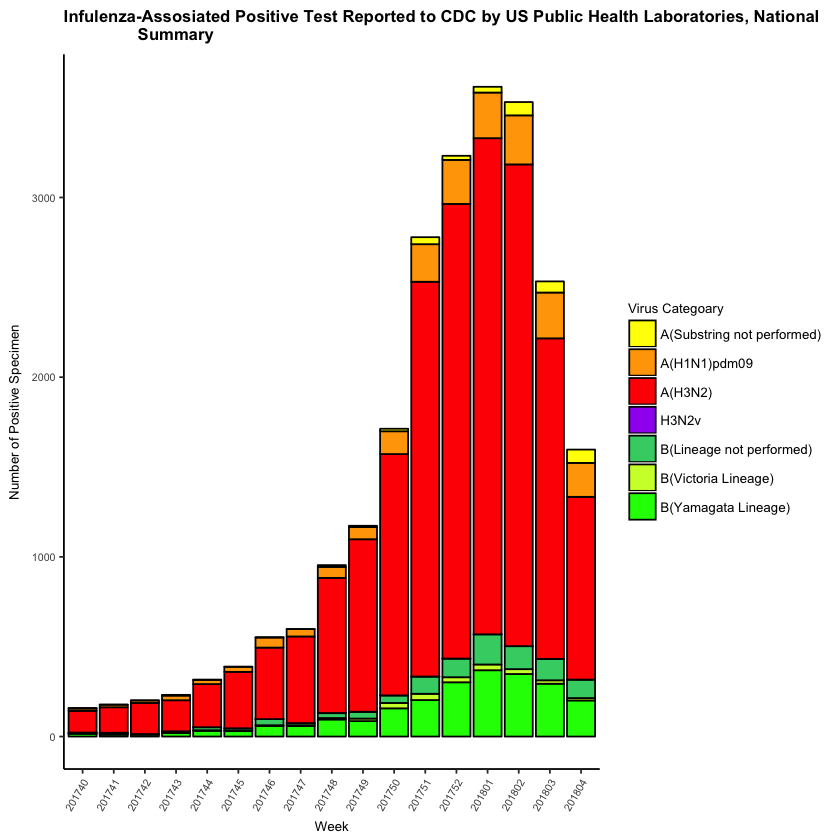

In [2]:
#*****************************************PositiveTest****************************************************
library(reshape2)
library(ggplot2)
pPostiveTest <- read.csv(file="PositiveTest.csv")[,1:8]
#head(pPostiveTest)
meltData <-melt(pPostiveTest,id.vars="Week")
#head(meltData)

p <- ggplot(meltData, aes(x = factor(Week)))

p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

p   <- p + scale_fill_manual(name = "Virus Categoary", labels = c("A(Substring not performed)", 
                            "A(H1N1)pdm09","A(H3N2)","H3N2v","B(Lineage not performed)","B(Victoria Lineage)",
                            "B(Yamagata Lineage)"), values = c("yellow","orange","red","purple","#3DD074","#cdff35",
                            "green"))

p <- p + labs(title = "Infulenza-Assosiated Positive Test Reported to CDC by US Public Health Laboratories, National 
                Summary",  y = "Number of Positive Specimen",x = "Week")
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 60, hjust = 1))

p <- p + theme(plot.title = element_text(size = 10, face = "bold") , legend.title=element_text(size=8),
                 legend.text=element_text(size=8), text = element_text(size=8))
p

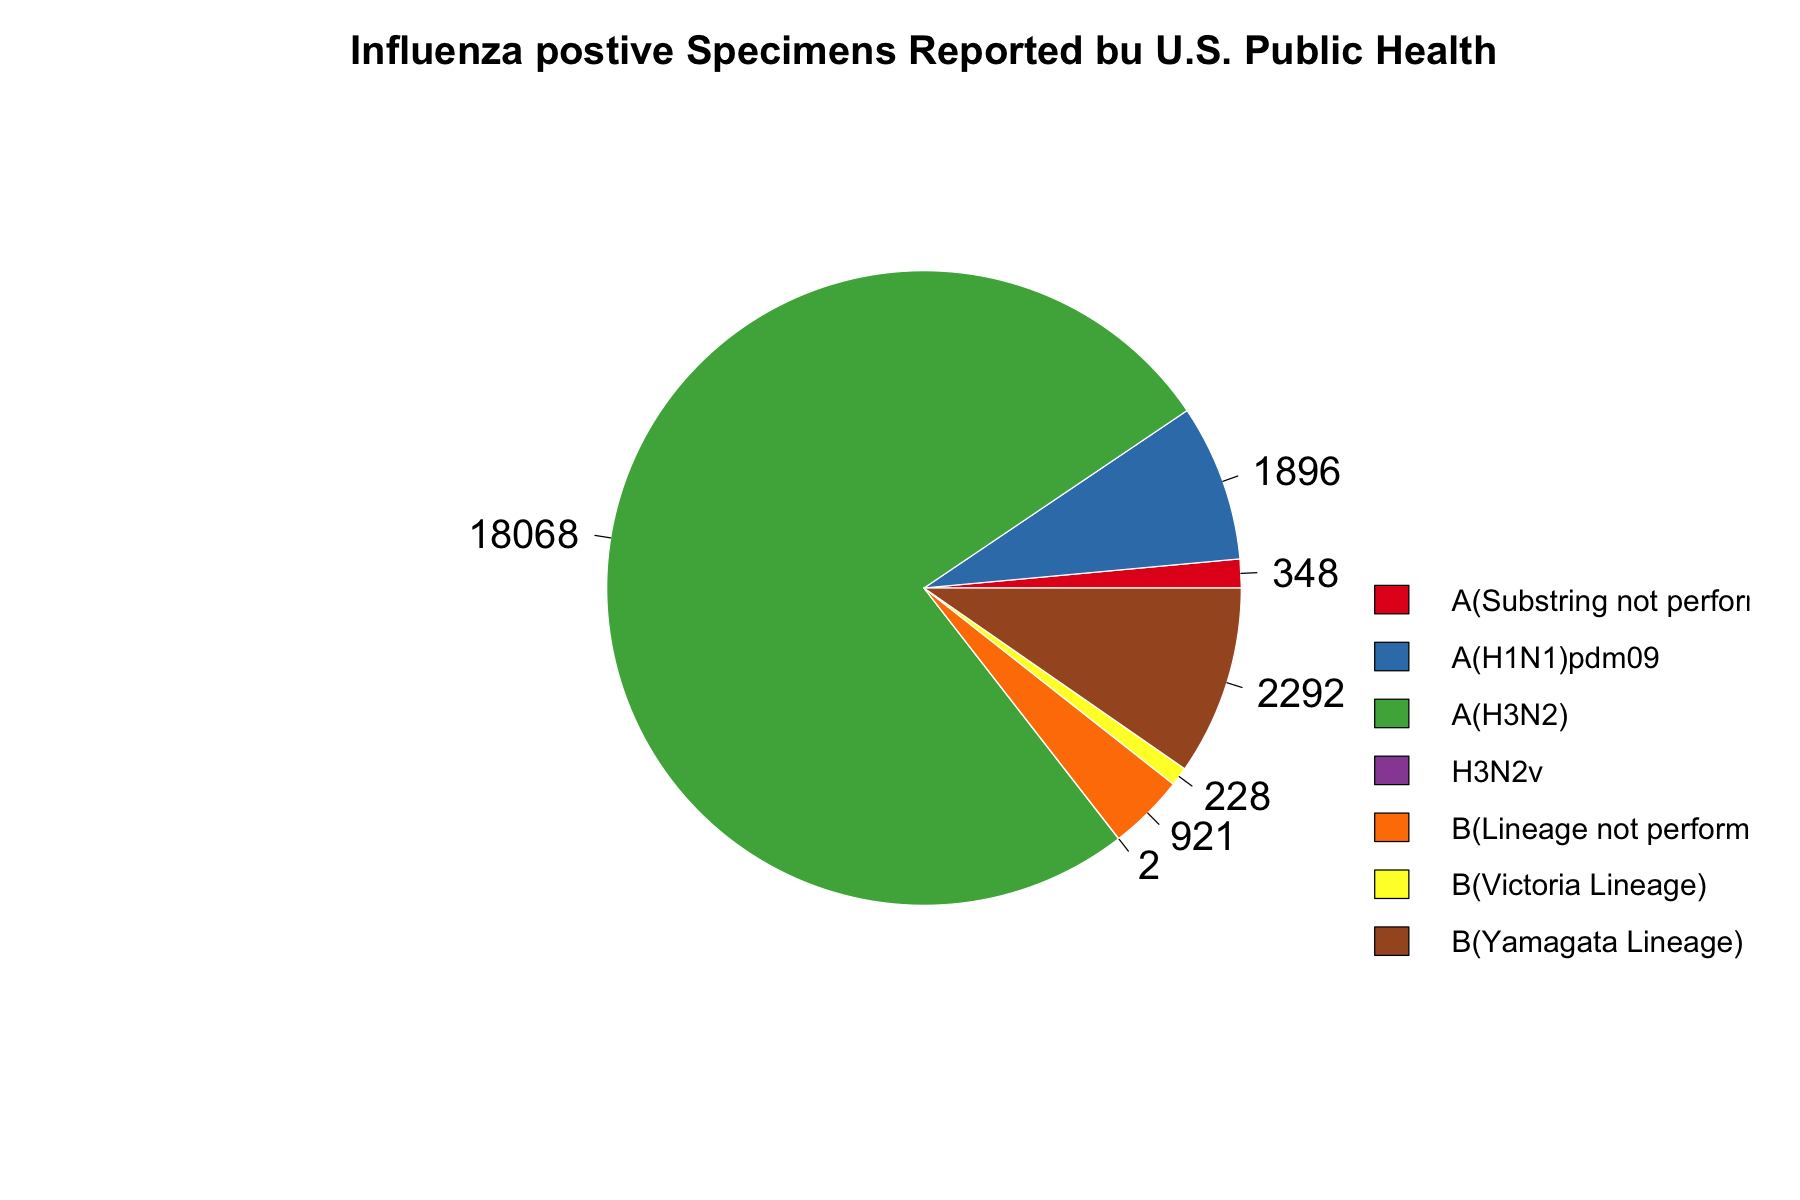

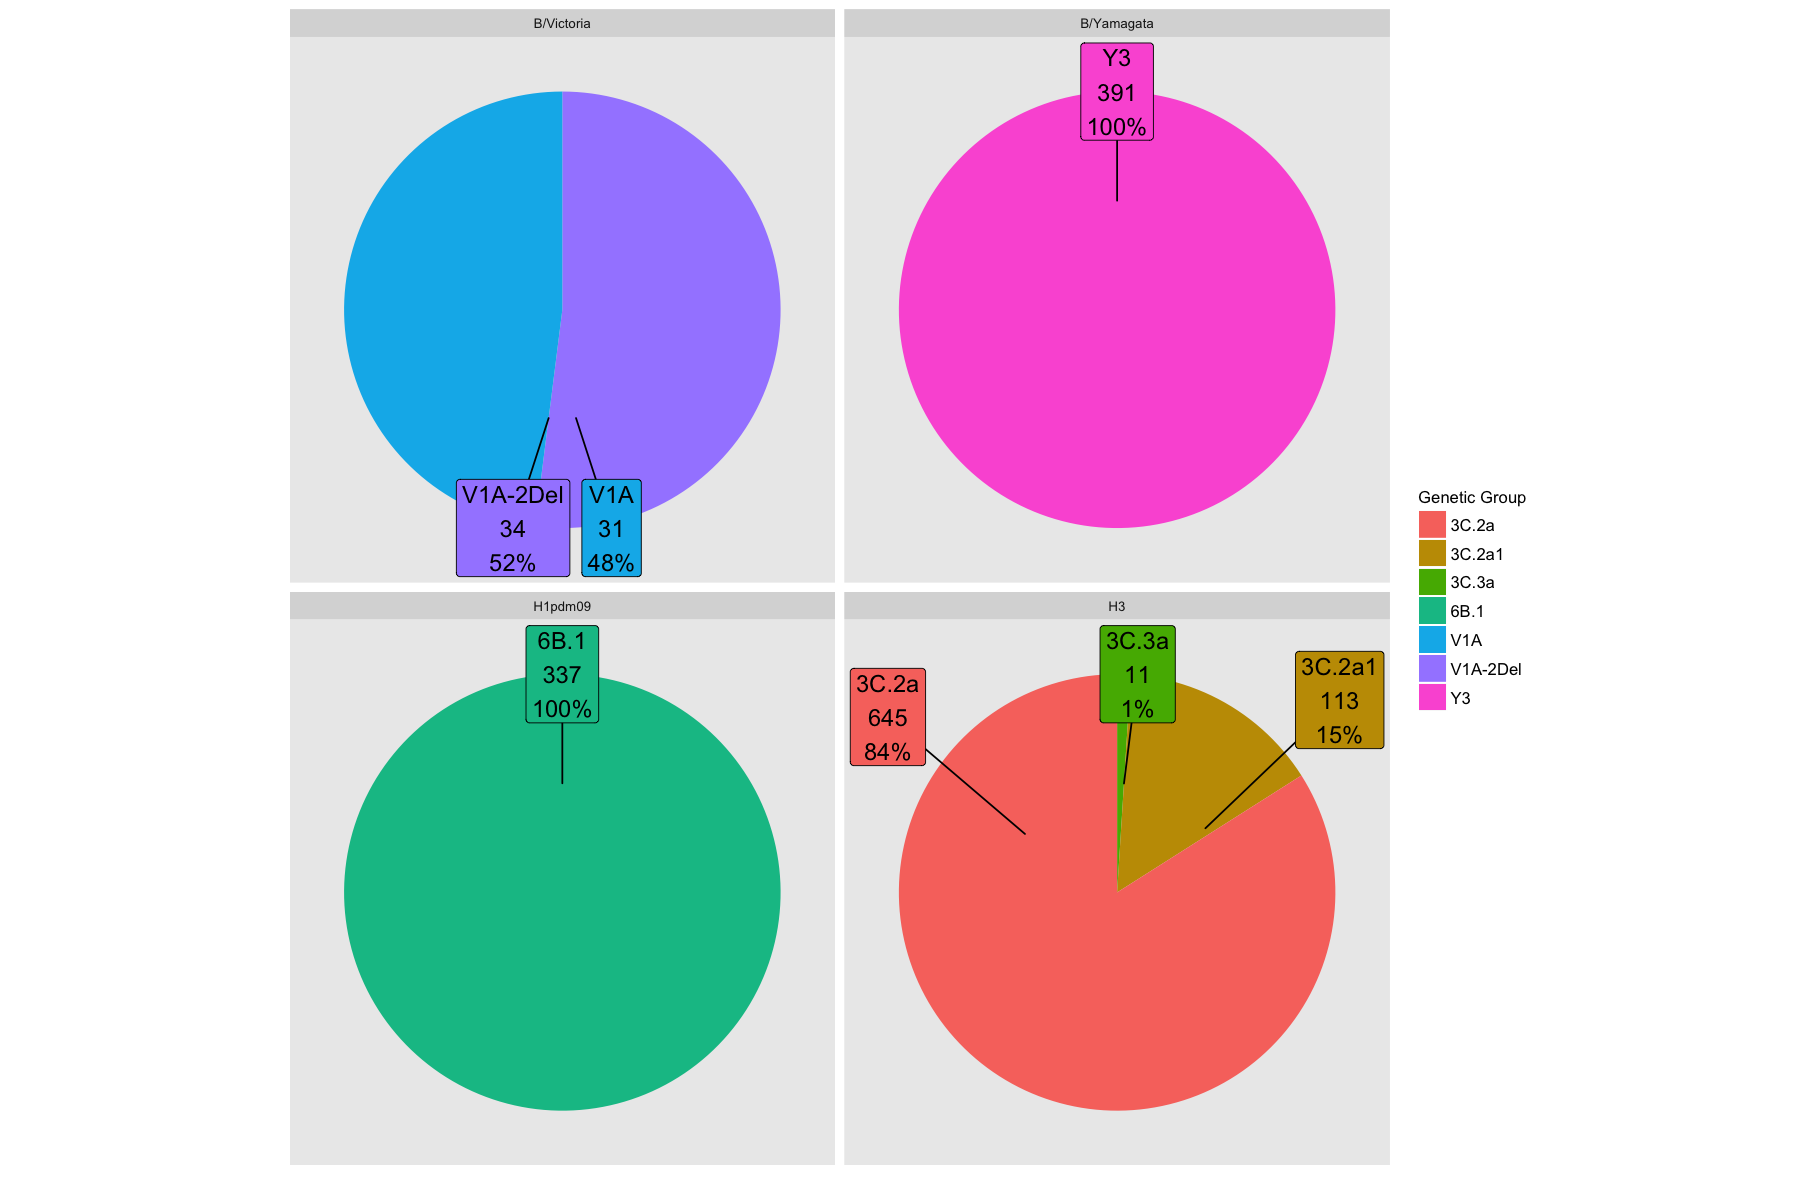

In [8]:
#*****************************************InfluenzasSub-type****************************************************
#install.packages("dplyr")
library(reshape2)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(RColorBrewer)
pSubType <- read.csv(file="InfluenzasSub-type.csv")
#head(pSubType)

pPostiveTest <- read.csv(file="PositiveTest.csv")[,1:8]
#head(pPostiveTest)
#colnames(pPostiveTest)[1]



df <- data.frame(
  group = c("A(Substring not performed)", "A(H1N1)pdm09","A(H3N2)","H3N2v","B(Lineage not performed)",
            "B(Victoria Lineage)", "B(Yamagata Lineage)"),
  value = c(sum(pPostiveTest$A.Subtyping.not.performed.), sum(pPostiveTest$A..H1N1.pdm09), 
           sum(pPostiveTest$A.H3N2.),sum(pPostiveTest$H3N2v),sum(pPostiveTest$B.lineage.not.performed.),
           sum(pPostiveTest$B.Victoria.Lineage),sum(pPostiveTest$B.Yamgata.Lineage.))
  )
#head(df)
#par(mar=c(5.1,4.1,4.1,2.1)


p <- pie(df$value, labels = df$value, 
    col=brewer.pal(7,"Set1"),border="white", radius=0.7,cex=2)

p <- p + title(main="Influenza postive Specimens Reported bu U.S. Public Health", cex.main=2)

legend(.9, .1,,legend=df$group, bty="n",cex=1.5,fill=brewer.pal(7,"Set1"))


label1 <- paste0(pSubType$Genetic_Group,"\n",pSubType$Number,"\n",pSubType$X..of..Sub.type.Total,"%")

library(ggplot2)
gg <- ggplot(pSubType, aes(x = factor(1), y = X..of..Sub.type.Total, fill = Genetic_Group)) 
gg <- gg + geom_bar(stat = "identity", width = 1) 
gg <- gg + coord_polar(theta = "y") 
gg <- gg + geom_label_repel(aes(label = label1), nudge_x = 1 , size=5, show.legend = F) 
gg <- gg + facet_wrap(~X.Sub.type)
gg <- gg + labs(y = "",x = "",fill="Genetic Group")
gg <- gg + theme(axis.text = element_blank(),axis.ticks = element_blank(),panel.grid  = element_blank())
gg <- gg + theme(plot.title = element_text(size = 10, face = "bold") , legend.title=element_text(size=10),
                 legend.text=element_text(size=10), text = element_text(size=10))
gg

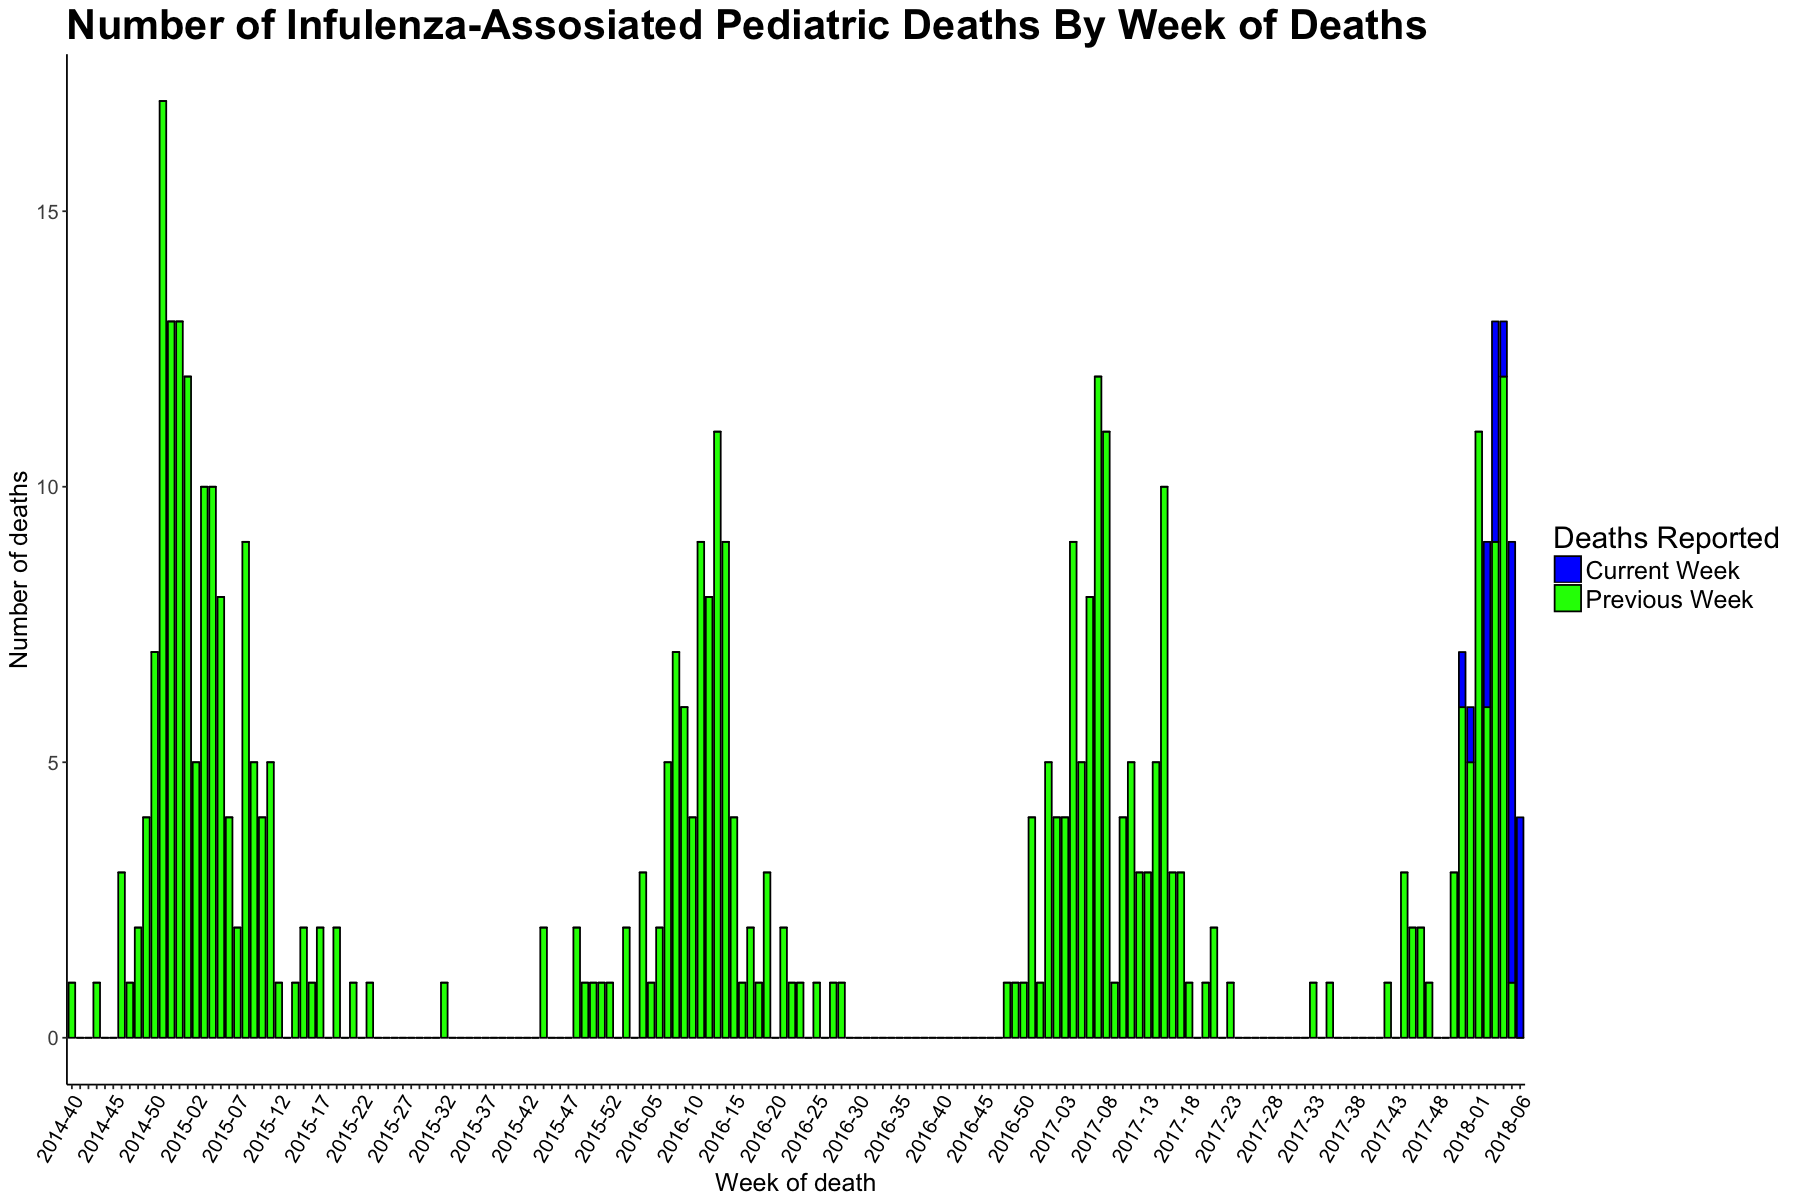

In [5]:

library(reshape2)
library(ggplot2)
pFluDeath <- read.csv(file="PedFluDeath_WeeklyData.csv")[,2:4]
#head(pFluDeath)
meltData <-melt(pFluDeath,id.vars="WEEK.NUMBER")
#head(meltData)

options(repr.plot.width=15, repr.plot.height=10)

p <- ggplot(meltData, aes(x =WEEK.NUMBER), width=1) 

#p <- p + scale_x_continuous(breaks = c("2014-40","2018-06"))

p <- p + geom_bar(aes(y = value, fill = variable), stat="identity",width = 0.8, colour="black") 

p <- p + scale_fill_manual(labels = c("Current Week", "Previous Week"), values = c("blue", "green"), 
                           name = "Deaths Reported")

p <- p + labs(title = "Number of Infulenza-Assosiated Pediatric Deaths By Week of Deaths", y = "Number of deaths",
              x = "Week of death") 

p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 60, hjust = 1))

p <- p + theme(axis.text.x=element_text(color=c("black","transparent","transparent","transparent","transparent")))
p <- p + theme(plot.title = element_text(size = 25, face = "bold") , legend.title=element_text(size=18),
                 legend.text=element_text(size=15), text = element_text(size=15))
p


Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Warning message:
“Ignoring unknown aesthetics: x, y”

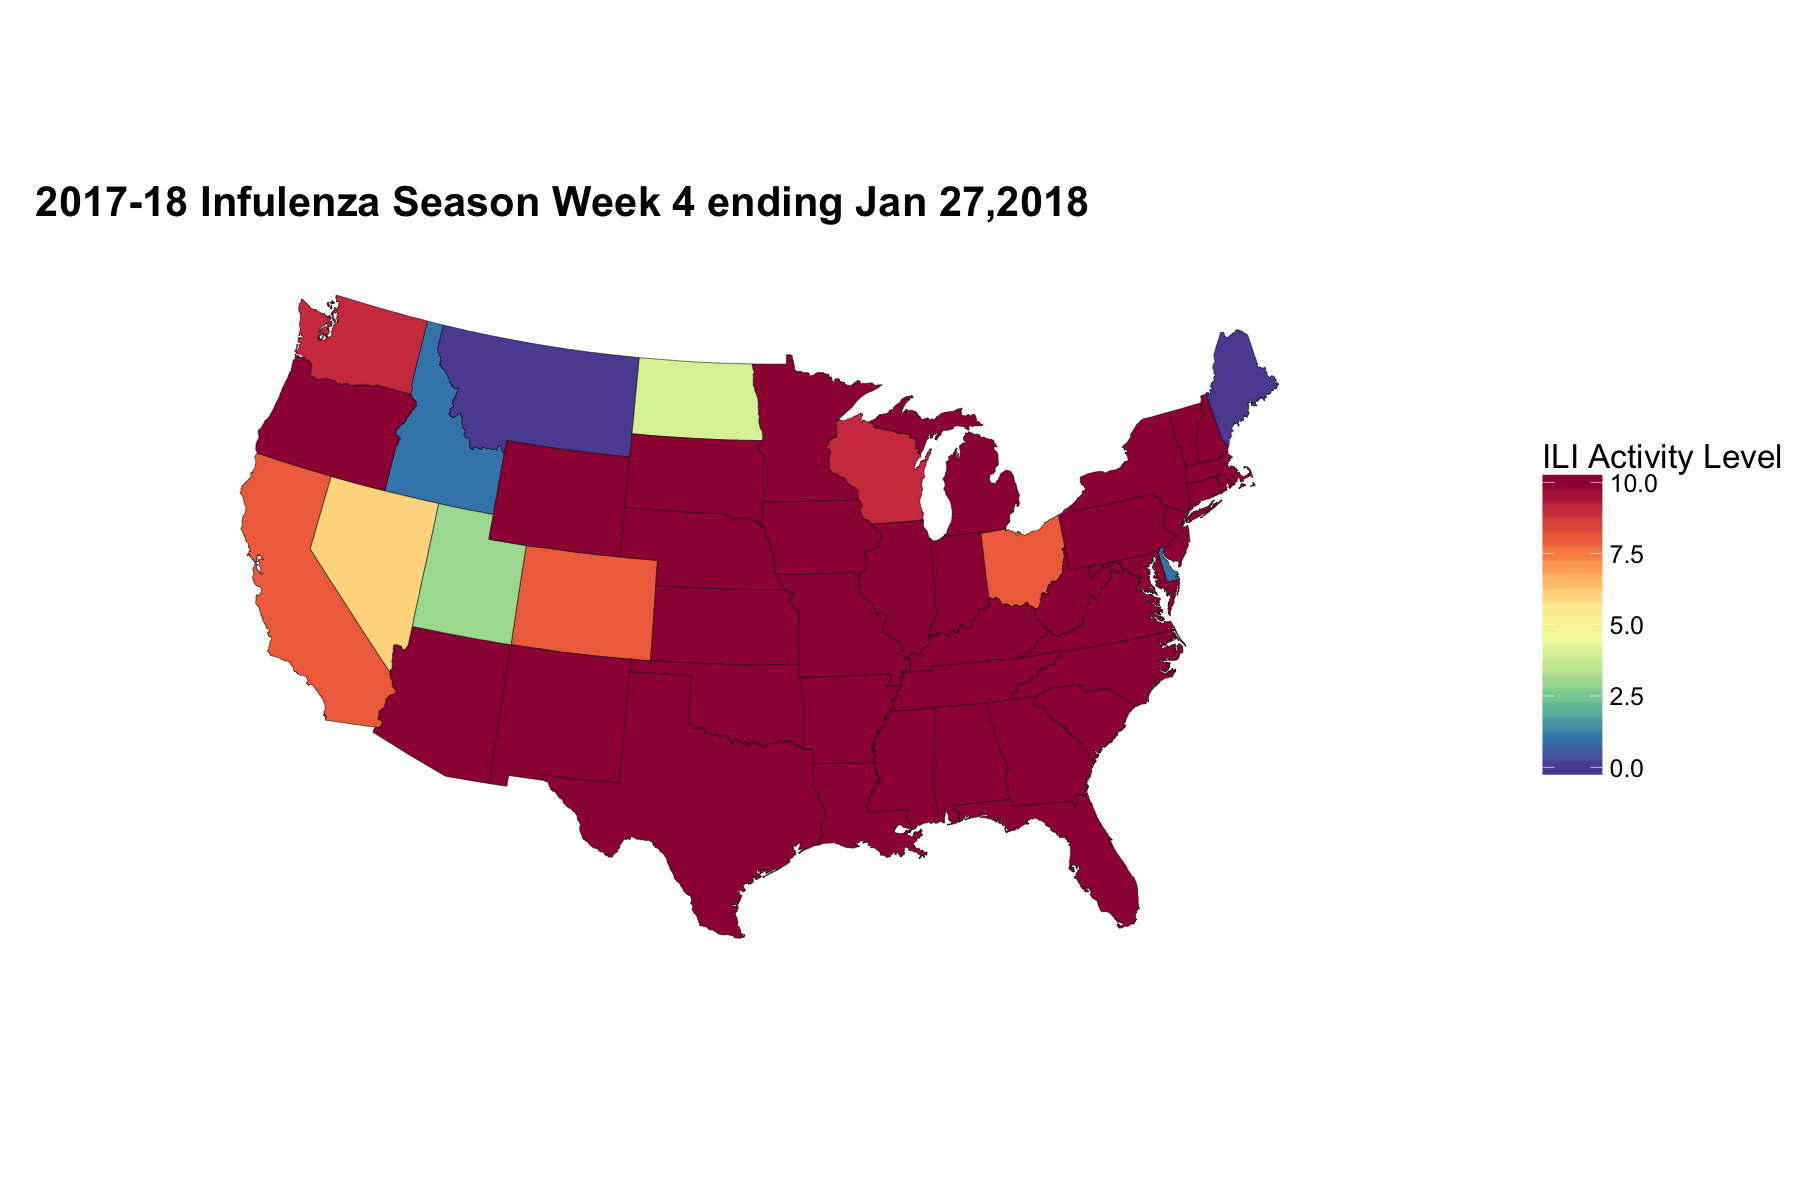

In [6]:
library(ggplot2)
library(maptools)
pMapData <- read.csv(file="HeatMap1.csv")
pMapData$region <- tolower(pMapData$STATENAME)
#head(pMapData)
library(RColorBrewer)

myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")))

us <- map_data("state")
gg <- ggplot()
gg <- gg + geom_map(data=us, map=us,aes(x = long, y = lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=0.8)
gg <- gg + geom_map(data=pMapData, map=us,
                    aes(fill=ACTIVITY.LEVEL, map_id=region),
                    color="black", size=0.15)
gg <- gg + labs(x="", y="", fill ="ILI Activity Level", title = "2017-18 Infulenza Season Week 4 ending Jan 27,2018")

gg <- gg + coord_map("albers", lat0 = 39, lat1 = 45) 
gg <- gg + theme(panel.border = element_blank(), panel.background = element_blank(), axis.ticks = element_blank(),
                axis.text = element_blank(), legend.key.size =  unit(0.5, "in"))

gg <- gg + theme(plot.title = element_text(size = 25, face = "bold") , legend.title=element_text(size=20),
                 legend.text=element_text(size=15))
gg <- gg + scale_fill_gradientn(colours = myPalette(10), limits=c(0,10))
gg